In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# !pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# We will read our CSV file from our Google Drive and store it in a variable called windowsData
import pandas as pd
windowsData = pd.read_csv('D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Windows_dataset/windows10_dataset.csv')
print(windowsData.shape)
windowsData.head()

(35975, 127)


,ts,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,1554206309,4,29.90817156,0,0.078240397,0,61.02750947,29.90817156,66.2001486,480.0949912,...,0.134876119,0.163098103,2.822198461,1924988.236,402.5827836,9100.481592,13.48761188,0.000405118,0,normal
1,1554206319,9,31.75168186,0,0.312520973,0,59.14459419,31.75168186,66.24773489,427.0412837,...,0.157564294,0.189279353,3.17150584,1497232.743,355.1343322,11153.55449,15.75642941,0.000532995,0,normal
2,1554206329,5,29.49516707,0,1.16822183,0,46.02794011,29.49516707,66.90038148,1159.426821,...,0.401773775,0.782471877,38.06981014,1854228.536,760.4317685,26994.26595,40.17737752,0.001028323,0,normal
3,1554206339,12,18.22437505,0,1.097191902,0,47.80621859,18.22437505,79.54520811,736.622011,...,0.259062331,0.768934004,50.98716725,15912390.29,699.4999538,53141.6638,25.90623311,0.001099429,0,normal
4,1554206349,12,14.86118688,0,1.562431019,0,41.8731513,14.86118688,82.73513724,896.1085985,...,0.103836186,1.081729712,97.7893526,23609299.7,1184.550425,40988.68444,10.38361856,0.000912738,0,normal


In [ ]:
# Counting the empty columns
windowsData.isna().sum().sum()

0

In [3]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values= ' ', strategy='constant', fill_value = -1)

# Imputing Columns 1 to 24
impute.fit(windowsData.iloc[:,1:126])
windowsData.iloc[:,1:126] = impute.transform(windowsData.iloc[:,1:126])

# Imputing Columns 1 to 24
impute.fit(windowsData.iloc[:,1:126])
windowsData.iloc[:,1:126] = impute.transform(windowsData.iloc[:,1:126])

windowsData.iloc[:,1:126] = (windowsData.iloc[:,1:126]).astype(float)

pd.set_option('display.max_rows', 129)

C:\Users\mashr\AppData\Local\Temp\ipykernel_2972\1588763478.py:14: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  windowsData.iloc[:,1:126] = (windowsData.iloc[:,1:126]).astype(float)


In [ ]:
# #---corelation heatmap----
# fig, ax = plt.subplots(figsize=(100,100))
# sns.heatmap(windowsData.iloc[:,0:126].corr(),annot=True, linewidth = 10, ax=ax, fmt='.0%')

In [4]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [5]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
# from sklearn.metrics import f1_score

#**Without Oversampling**

In [6]:
x = windowsData.drop(['ts','type','label'],axis=1)
y = windowsData['label']

#**Decision Tree**

In [7]:
# --------------------------Decision Tree -----------------------------------
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train) #Training the model
y_pred_dtc = dtc.predict(x_test)
print(y_pred_dtc)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
dtcAccuracy = round(accuracy_score(y_test, y_pred_dtc)*100,2)
print("Accuracy of Decisiontree: ",dtcAccuracy)

#F1 Score

from sklearn.metrics import f1_score
dtcF1 = round(f1_score(y_test, y_pred_dtc)*100,2)
print("f1_score of Decisiontree: ",dtcF1)

#AUC Score

from sklearn.metrics import roc_auc_score
dtcAuc = round(roc_auc_score (y_test, y_pred_dtc)*100,2)
print('AUC Score of Decision Tree:',dtcAuc)

[0. 0. 0. ... 0. 0. 0.]
Accuracy of Decisiontree:  97.35
f1_score of Decisiontree:  95.71
AUC Score of Decision Tree: 96.89


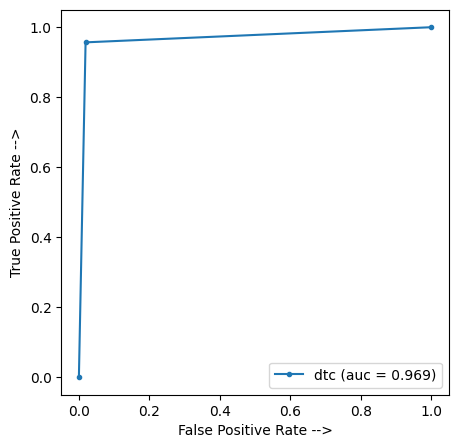

In [8]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

dtc_fpr, dtc_tpr, threshold = roc_curve(y_test, y_pred_dtc)
auc_dtc = auc(dtc_fpr, dtc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='dtc (auc = %0.3f)' % auc_dtc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

<AxesSubplot: >

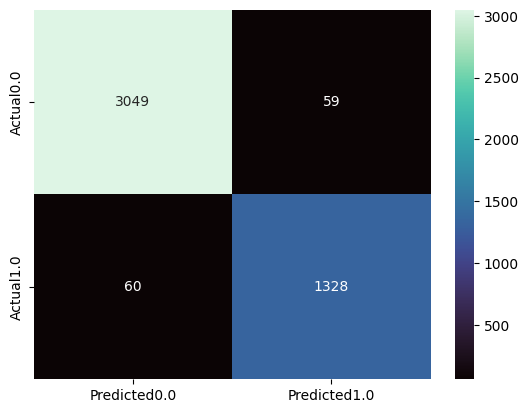

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_dtc)

# **With OverSampling**

In [10]:
#OVersampling code
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0.0: 21763, 1.0: 9716}
After oversampling {0.0: 21763, 1.0: 21763}


# **Decision Tree**

In [11]:
# --------------------------Decision Tree -----------------------------------
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train) #Training the model
y_pred_dtc = dtc.predict(x_test)
print(y_pred_dtc)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
ovr_dtcAccuracy = round(accuracy_score(y_test, y_pred_dtc)*100,2)
print("Accuracy of DecisionTree after oversampling:",ovr_dtcAccuracy)

#F1 Score

from sklearn.metrics import f1_score
ovr_dtcF1 = round(f1_score(y_test, y_pred_dtc)*100,2)
print("f1_score of DecisionTree after oversampling:",ovr_dtcF1)

#AUC Score

from sklearn.metrics import roc_auc_score
ovr_dtcAuc = round(roc_auc_score (y_test, y_pred_dtc)*100,2)
print('AUC Score of Decision Tree:', ovr_dtcAuc)

[0. 0. 0. ... 1. 1. 1.]
Accuracy of DecisionTree after oversampling: 97.92
f1_score of DecisionTree after oversampling: 97.94
AUC Score of Decision Tree: 97.92


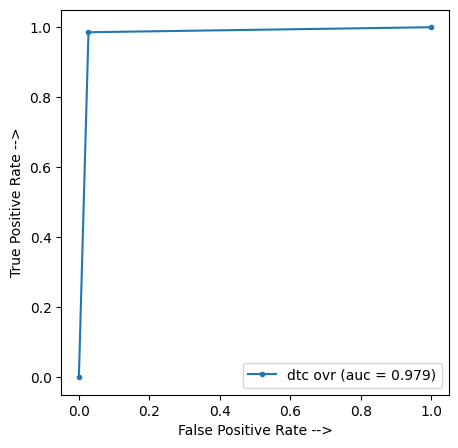

In [12]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

dtc_fpr, dtc_tpr, threshold = roc_curve(y_test, y_pred_dtc)
auc_dtc = auc(dtc_fpr, dtc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='dtc ovr (auc = %0.3f)' % auc_dtc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

<AxesSubplot: >

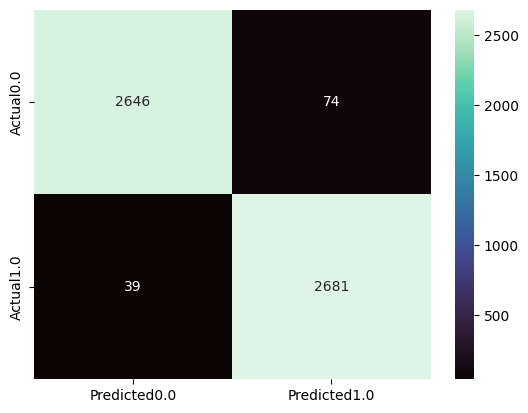

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_dtc)

# **undersampling on the data**

In [14]:
x = windowsData.drop(['ts','type','label'],axis=1)
y = windowsData['label']

In [15]:
x = windowsData.drop(['ts','type','label'],axis=1)
y = windowsData['label']
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from collections import Counter

#Seeing the value count before oversampling
print("Before undersampling", Counter(y_train))

rus = RandomUnderSampler(random_state=12)
x_unsampled, y_unsampled = rus.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
print("After undersampling",Counter(y_unsampled))

Before undersampling Counter({0.0: 21763, 1.0: 9716})
After undersampling Counter({0.0: 9716, 1.0: 9716})


In [16]:
for train_index, test_index in skf.split(x_unsampled, y_unsampled):
    x_train, x_test, y_train, y_test = x_unsampled.iloc[train_index], x_unsampled.iloc[test_index], y_unsampled.iloc[train_index], y_unsampled.iloc[test_index]

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train) #Training the model
y_pred_dtc = dtc.predict(x_test)
print(y_pred_dtc)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
und_dtcAccuracy = round(accuracy_score(y_test, y_pred_dtc)*100,2)
print("Accuracy of DecisionTree undersampled : ",und_dtcAccuracy)

#F1 Score

from sklearn.metrics import f1_score
und_dtcF1 = round(f1_score(y_test, y_pred_dtc)*100,2)
print("f1_score of DecisionTree undersampled: ",und_dtcF1)

#AUC Score

from sklearn.metrics import roc_auc_score
try:
  und_dtcAuc = round(roc_auc_score (y_test, y_pred_dtc)*100,2)
  print('AUC Score of Decision Tree undersampled:', und_dtcAuc)
except ValueError:
    pass



[0. 0. 0. ... 1. 1. 1.]
Accuracy of DecisionTree undersampled :  96.87
f1_score of DecisionTree undersampled:  96.86
AUC Score of Decision Tree undersampled: 96.87


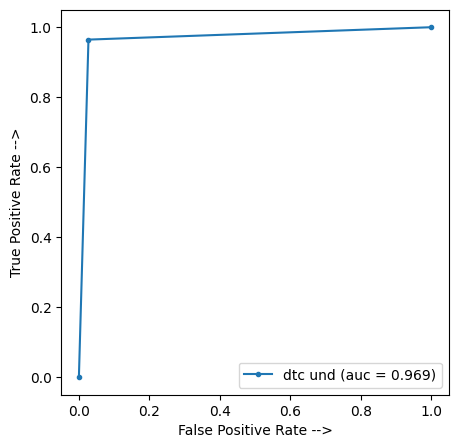

In [17]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

dtc_fpr, dtc_tpr, threshold = roc_curve(y_test, y_pred_dtc)
auc_dtc = auc(dtc_fpr, dtc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='dtc und (auc = %0.3f)' % auc_dtc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

<AxesSubplot: >

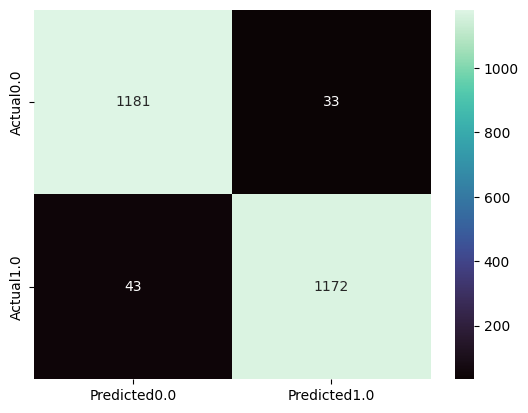

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_dtc)

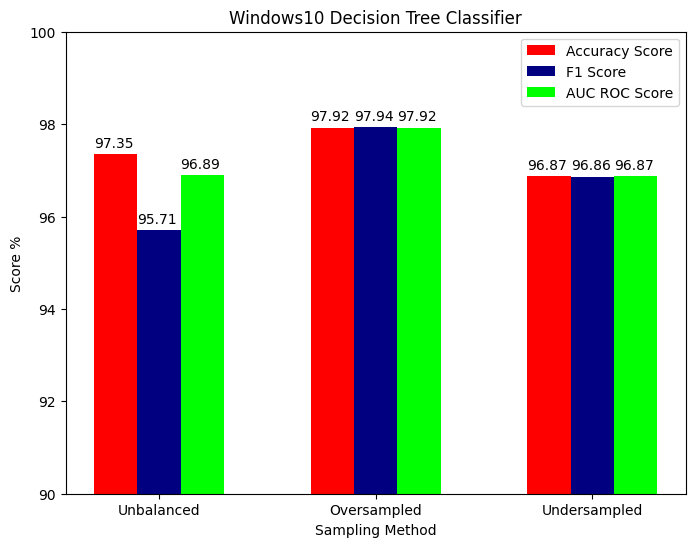

In [20]:
#Plotting a bar graph to compare the accuracy scores of the different scoring metrics
all_accuracy_scores = [dtcAccuracy, ovr_dtcAccuracy, und_dtcAccuracy]
all_f1_scores = [dtcF1, ovr_dtcF1, und_dtcF1]
all_auc_roc_scores = [dtcAuc, ovr_dtcAuc, und_dtcAuc]

x_labels = ['Unbalanced', 'Oversampled', 'Undersampled']

def autolabel(rectangle_group):
    for rect in rectangle_group:
        height = rect.get_height()

        ax.annotate(str(height), xy = (rect.get_x(), height+.15))

width = 0.2

x_all_accuracy_score = [x-width for x in range (len(all_accuracy_scores))]
x_all_f1_score = [x for x in range (len(all_f1_scores))]
x_all_auc_roc_score = [x+width for x in range (len(all_auc_roc_scores))]

fig,ax = plt.subplots(figsize = (8, 6))
rect1 = ax.bar(x_all_accuracy_score ,all_accuracy_scores, width, label='Accuracy Score', color = 'red')
rect2 = ax.bar(x_all_f1_score, all_f1_scores, width, label='F1 Score', color='navy')
rect3 = ax.bar(x_all_auc_roc_score, all_auc_roc_scores, width, label='AUC ROC Score', color='lime')
plt.xticks([x for x in range(len(x_labels))], x_labels)
ax.set_title('Windows10 Decision Tree Classifier')
ax.set_xlabel('Sampling Method')
ax.set_ylabel('Score %')
plt.ylim([90, 100])
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
plt.show()

#**Unnecessary**

In [ ]:
# #ROC CURVE:
# from sklearn.metrics import roc_curve, auc

# logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
# auc_logistic = auc(logistic_fpr, logistic_tpr)

# plt.figure(figsize=(5, 5), dpi=100)
# plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

# plt.xlabel('False Positive Rate -->')
# plt.ylabel('True Positive Rate -->')

# plt.legend()

# plt.show()

In [ ]:
# # --------------------------DecisionTree -----------------------------------
# from sklearn.tree import DecisionTreeClassifier
# from statistics import mean
# DT_accuracy_scores = []
# DT_f1_scores = []

# for train_index, test_index in skf.split(x, y):
#     x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

#     DT_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
#     DT_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

# print('K-Fold Accuracy Score: ',mean(DT_accuracy_scores))
# print('K-Fold F1 Score:', mean(DT_f1_scores))

In [ ]:
# # --------------------------Logistic Reg -----------------------------------

# und_x = under_sample.loc[:, windowsData.columns !=target]
# und_y = under_sample.loc[:, windowsData.columns == target]

# from sklearn.linear_model import LogisticRegression
# from statistics import mean
# lru_accuracy_scores = []
# lru_f1_scores = []

# for train_index, test_index in skf.split(und_x, und_y):
#     x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]
#     lru_accuracy_scores.append(get_accuracy_score(LogisticRegression(solver='newton-cg'), x_train, x_test, y_train, y_test))
#     lru_f1_scores.append(get_f1_score(LogisticRegression(solver='newton-cg'), x_train, x_test, y_train, y_test))

# print('Accuracy Score:',mean(lru_accuracy_scores))
# print('F1 Score:', mean(lru_f1_scores))

In [ ]:
# # --------------------------DecisionTree -----------------------------------
# und_x = under_sample.loc[:, windowsData.columns !=target]
# und_y = under_sample.loc[:, windowsData.columns == target]

# from sklearn.tree import DecisionTreeClassifier
# from statistics import mean
# DT_accuracy_scores = []
# DT_f1_scores = []

# for train_index, test_index in skf.split(und_x, und_y):
#     x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]

#     DT_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
#     DT_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

# print('K-Fold Accuracy Score: ',mean(DT_accuracy_scores))
# print('K-Fold F1 Score:', mean(DT_f1_scores))

In [ ]:
# # --------------------------DecisionTree -----------------------------------
# from sklearn.tree import DecisionTreeClassifier
# from statistics import mean
# DT_accuracy_scores = []
# DT_f1_scores = []

# for train_index, test_index in skf.split(x_train_sm, y_train_sm):
#     x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

#     DT_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
#     DT_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

# print('K-Fold Accuracy Score: ',mean(DT_accuracy_scores))
# print('K-Fold F1 Score:', mean(DT_f1_scores))

In [ ]:
# # --------------------------Random Forest -----------------------------------
# RF_accuracy_scores = []
# RF_f1_scores = []

# for train_index, test_index in skf.split(x_train_sm, y_train_sm):
#     x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

#     RF_accuracy_scores.append(get_accuracy_score(RandomForestClassifier(n_estimators=10, random_state=1), x_train, x_test, y_train, y_test))
#     RF_f1_scores.append(get_f1_score(RandomForestClassifier(), x_train, x_test, y_train, y_test))

# print('Accuracy Score after oversampling: ',mean(RF_accuracy_scores))
# print('F1 Score after oversampling:', mean(RF_f1_scores))

In [ ]:
# # --------------------------Random Forest -----------------------------------
# und_x = under_sample.loc[:, windowsData.columns !=target]
# und_y = under_sample.loc[:, windowsData.columns == target]

# from sklearn.ensemble import RandomForestClassifier
# from statistics import mean
# RF_accuracy_scores = []
# RF_f1_scores = []

# for train_index, test_index in skf.split(und_x, und_y):
#     x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]

#     DT_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
#     DT_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

# print('K-Fold Accuracy Score: ',mean(RF_accuracy_scores))
# print('K-Fold F1 Score:', mean(RF_f1_scores))

In [ ]:
# # --------------------------Logistic Reg -----------------------------------
# from sklearn.linear_model import LogisticRegression
# from statistics import mean
# lr_accuracy_scores = []
# lr_f1_scores = []

# for train_index, test_index in skf.split(x_train_sm, y_train_sm):
#     x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

#     lr_accuracy_scores.append(get_accuracy_score(LogisticRegression(class_weight= 'balanced'), x_train, x_test, y_train, y_test))
#     lr_f1_scores.append(get_f1_score(LogisticRegression(class_weight= 'balanced'), x_train, x_test, y_train, y_test))

# print('K-Fold Accuracy Score: ',mean(lr_accuracy_scores))
# print('K-Fold F1 Score:', mean(lr_f1_scores))